# Homework

Using Pandas and Statsmodels write a Jupyter Notebook that: 
1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the Human Mortality Database and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a pull request to the course's github repository.

In [1]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

pathout = "./data/"

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = "./graphs/"
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [3]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [4]:
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820.0,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870.0,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913.0,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950.0,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951.0,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012.0,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013.0,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014.0,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015.0,1759.0,1560.0,14230.0,Extrapolated,NaN


In [5]:
#Vamos a cambiar el formato de los años dado que esta como numero entero

In [6]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015,1759.0,1560.0,14230.0,Extrapolated,NaN


In [7]:
maddison_new.head().year.astype(int)

0    1820
1    1870
2    1913
3    1950
4    1951
Name: year, dtype: int32

# Datos originales de Maddison

In [8]:
#se importa urllib dado que permite hacer interacción con internet, esta es solo una forma, existen diferentes por tanto hay
#que averiguar cual es la mejor para lo que se desee hacer

In [9]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    import xlrd
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

In [10]:
#skiprows: elimina las dos primeras filas del libro de excel dado que no son importantes

In [11]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [12]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)

In [13]:
maddison_old_pop.columns

Index([     'Country',              1,   'Unnamed: 2',           1000,
         'Unnamed: 4',           1500,   'Unnamed: 6',           1600,
         'Unnamed: 8',           1700,
       ...
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
       'Unnamed: 201',           2030],
      dtype='object', length=203)

In [14]:
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]
maddison_old_pop

,Country,1,1000,1500,1600,1700,1820,1821,1822,1823,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [15]:
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]
maddison_old_pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [16]:
pop = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)
pop = pop.dropna(subset=['pop_1'])
pop = pop.loc[2:]
pop ['Country'] = pop.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
pop = pop.loc[pop.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,134323.0,135615.0,136912.0,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,NaN,NaN,NaN,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,NaN,NaN,NaN,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,NaN,NaN,NaN,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,NaN,NaN,NaN,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,NaN,NaN,NaN,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,NaN,NaN,NaN,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [17]:
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [18]:
pop = pd.wide_to_long(pop, ['pop_'], i='Country', j='year').reset_index()
pop

,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
...,...,...,...
499,East Europe,2030,113555
500,Latin America,2030,724465
501,Asia,2030,4.91693e+06
502,Africa,2030,1.51743e+06


# Plotting

In [19]:
#Sirven para realizar graficas

In [20]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [21]:
pop2 = pop.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
pop2

Country,Africa,Asia,East Europe,Latin America,Western Europe,Western Offshoots,World
year,,,,,,,
1,17000.000,1.684000e+05,4750.000,5600.000,25050.000,1120.0,2.258200e+05
1000,32300.000,1.826000e+05,6500.000,11400.000,25560.000,1870.0,2.673300e+05
1500,46610.000,2.838000e+05,13500.000,17500.000,57268.000,2800.0,4.384280e+05
1600,55320.000,3.785000e+05,16950.000,8600.000,73778.000,2300.0,5.561480e+05
1700,61080.000,4.018000e+05,18800.000,12050.000,81460.000,1750.0,6.034900e+05
...,...,...,...,...,...,...,...
2006,931486.521,3.882964e+06,120463.680,565415.973,399607.161,355678.0,6.540214e+06
2007,952787.083,3.927514e+06,120378.032,572829.964,400512.458,358548.0,6.616689e+06
2008,974527.690,3.972154e+06,120274.466,580217.248,401352.880,362621.0,6.694832e+06


Text(0, 0.5, 'Population')

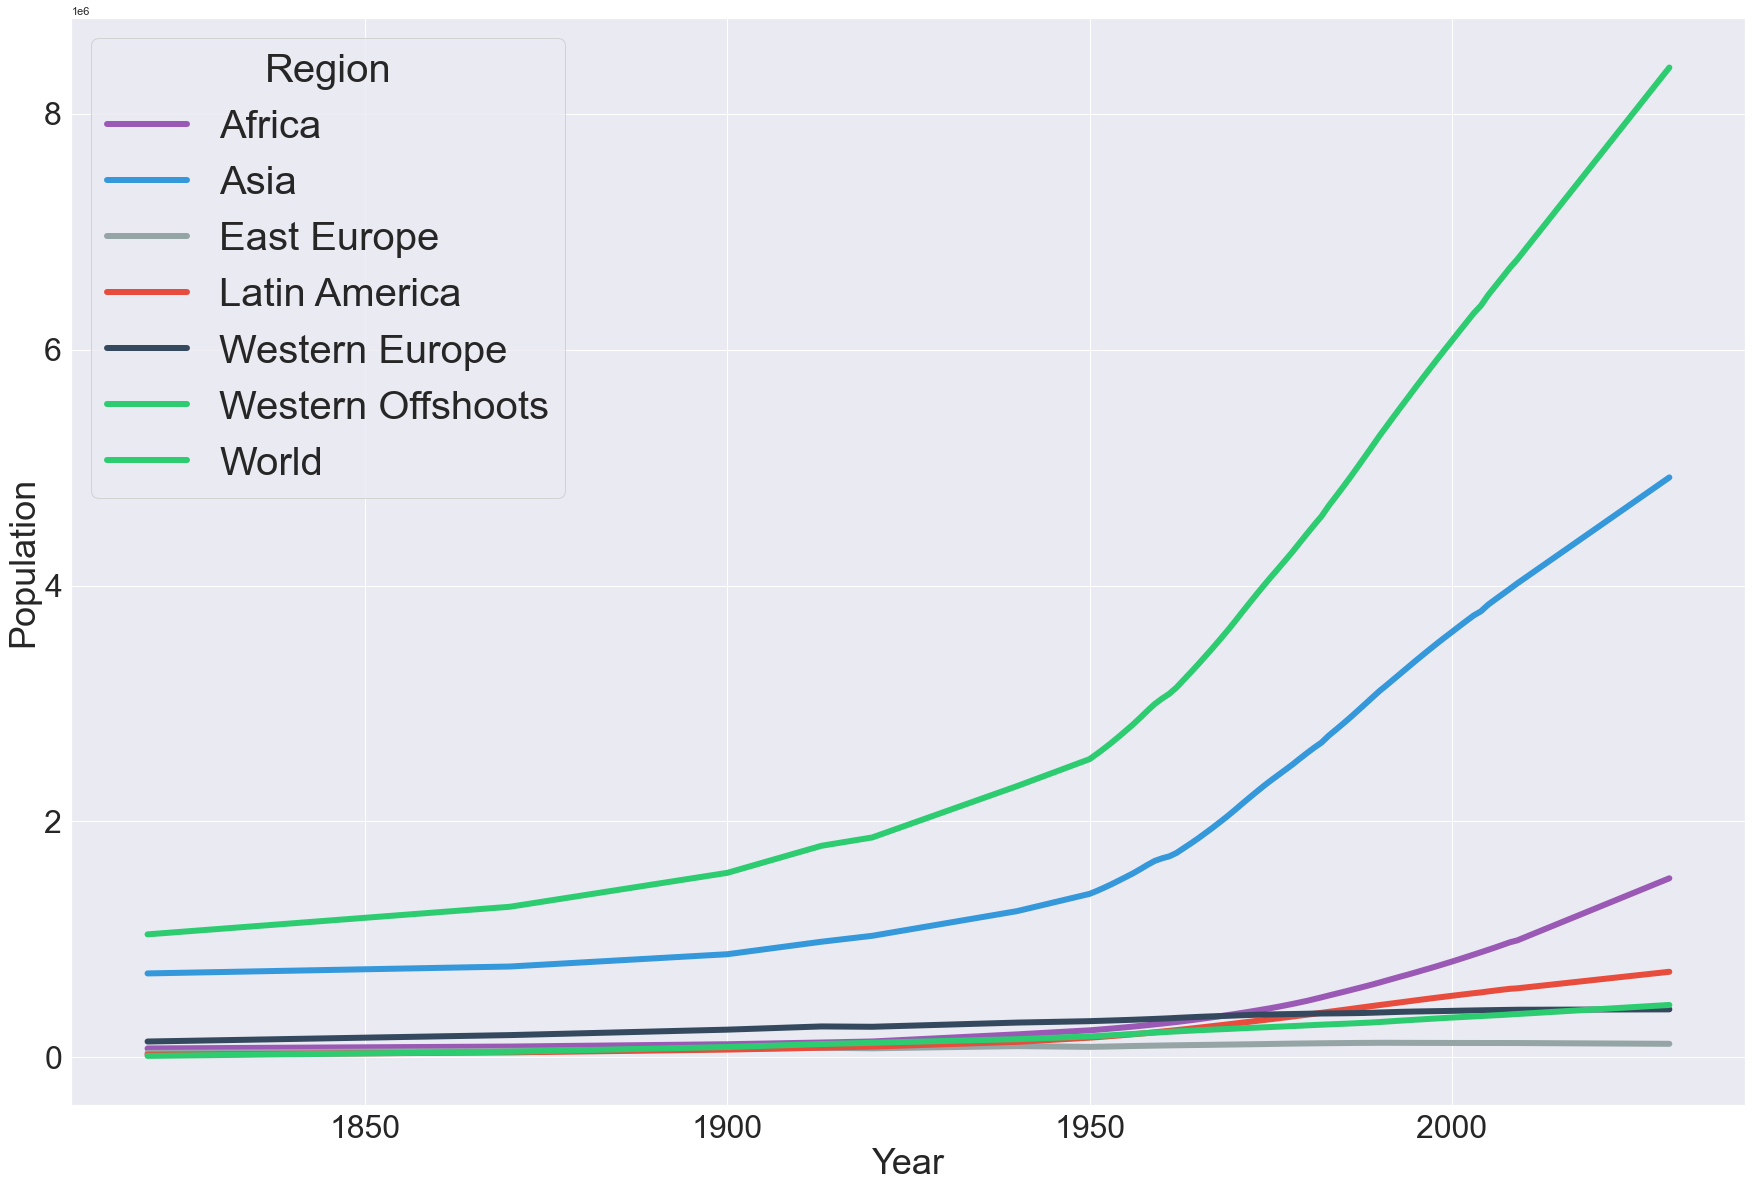

In [22]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
pop2.loc[1800:].plot(ax=ax, linewidth=6, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Population', fontsize=36)

# Con seaborn

Text(0, 0.5, 'Population)')

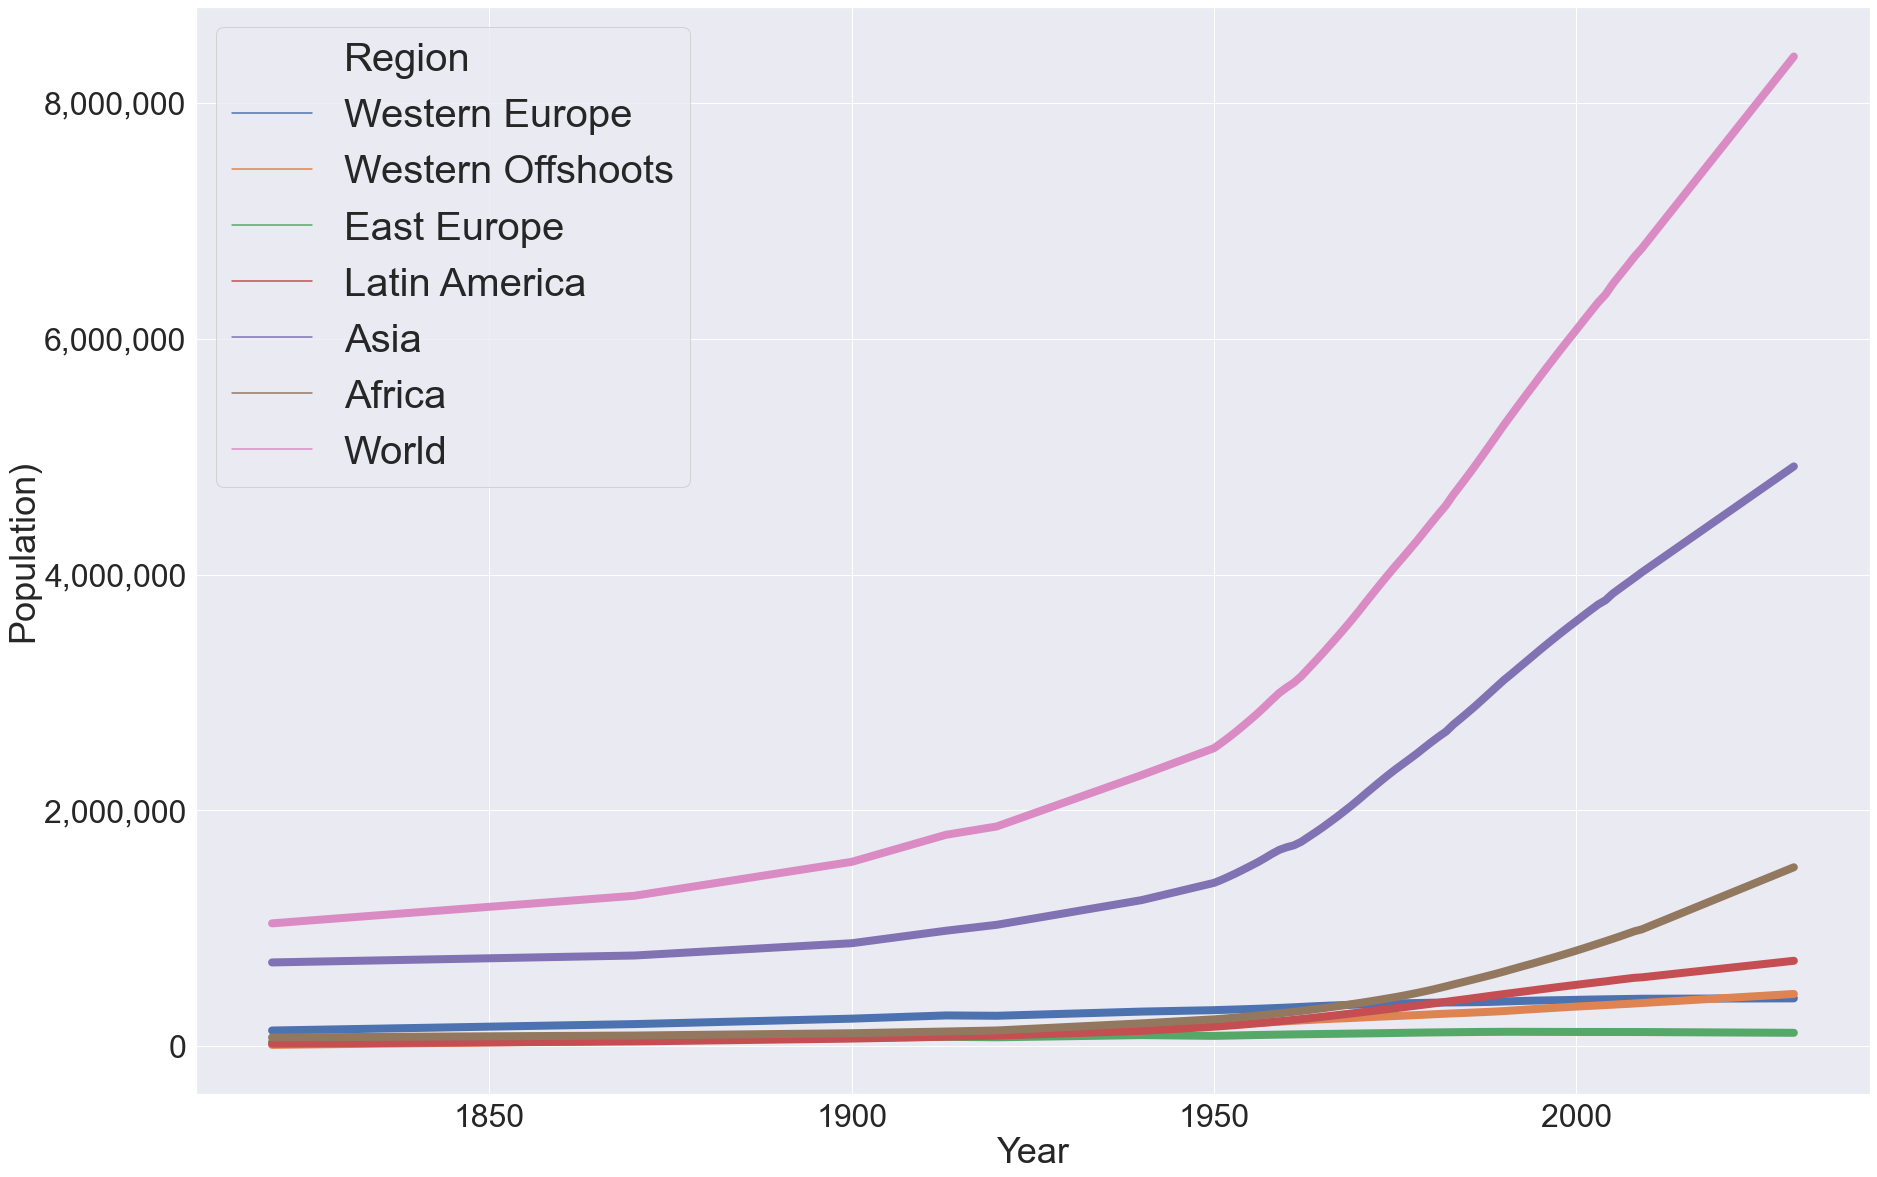

In [23]:
pop['Region'] = pop.Country.astype('category')
pop['pop_'] = pop.pop_.astype(float)
# Plot
fig, ax = plt.subplots(figsize=(30,20))
sns.lineplot(x='year', y='pop_', hue='Region', data=pop.loc[pop.year>=1800].reset_index(drop=True), alpha=1, lw=8, style='Region', dashes=False, markers=False)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Population)', fontsize=36)

# 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [24]:
if not os.path.exists(pathout + 'BwFertility.xls'):
    import urllib
    import xlrd
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Bwfertility.xls')

In [64]:
bw_fertility = pd.read_excel(pathout + 'BwFertility.xls', sheet_name="Data", skiprows=3)
bw_fertility

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,...,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.290,2.240,2.190,2.160,2.130,2.090,2.060,2.020,2.000,NaN
260,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.938,7.962,7.991,8.026,8.067,8.114,...,4.674,4.554,4.439,4.326,4.214,4.103,3.994,3.890,3.792,NaN
261,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.041,6.028,6.010,5.986,5.956,5.920,...,2.598,2.582,2.561,2.537,2.511,2.484,2.457,2.430,2.405,NaN
262,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.115,7.169,7.214,7.249,7.274,7.291,...,5.415,5.328,5.233,5.132,5.026,4.918,4.814,4.718,4.633,NaN


In [65]:
bw_fertility.columns = ['Country'] + [ "fert_" + str(col) for col in bw_fertility.columns[1:]]
bw_fertility

,Country,fert_Country Code,fert_Indicator Name,fert_Indicator Code,fert_1960,fert_1961,fert_1962,fert_1963,fert_1964,fert_1965,...,fert_2010,fert_2011,fert_2012,fert_2013,fert_2014,fert_2015,fert_2016,fert_2017,fert_2018,fert_2019
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,...,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.290,2.240,2.190,2.160,2.130,2.090,2.060,2.020,2.000,NaN
260,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.938,7.962,7.991,8.026,8.067,8.114,...,4.674,4.554,4.439,4.326,4.214,4.103,3.994,3.890,3.792,NaN
261,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.041,6.028,6.010,5.986,5.956,5.920,...,2.598,2.582,2.561,2.537,2.511,2.484,2.457,2.430,2.405,NaN
262,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.115,7.169,7.214,7.249,7.274,7.291,...,5.415,5.328,5.233,5.132,5.026,4.918,4.814,4.718,4.633,NaN


In [66]:
bw_fertility = bw_fertility[[col for col in bw_fertility.columns if str(col).startswith('fert_Country Code')==False]]
bw_fertility = bw_fertility[[col for col in bw_fertility.columns if str(col).startswith('fert_Indicator Name')==False]]
bw_fertility = bw_fertility[[col for col in bw_fertility.columns if str(col).startswith('fert_Indicator Code')==False]]
bw_fertility

,Country,fert_1960,fert_1961,fert_1962,fert_1963,fert_1964,fert_1965,fert_1966,fert_1967,fert_1968,...,fert_2010,fert_2011,fert_2012,fert_2013,fert_2014,fert_2015,fert_2016,fert_2017,fert_2018,fert_2019
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN
1,Afghanistan,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN
2,Angola,6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,...,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN
3,Albania,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,...,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.290,2.240,2.190,2.160,2.130,2.090,2.060,2.020,2.000,NaN
260,"Yemen, Rep.",7.938,7.962,7.991,8.026,8.067,8.114,8.166,8.222,8.278,...,4.674,4.554,4.439,4.326,4.214,4.103,3.994,3.890,3.792,NaN
261,South Africa,6.041,6.028,6.010,5.986,5.956,5.920,5.878,5.832,5.782,...,2.598,2.582,2.561,2.537,2.511,2.484,2.457,2.430,2.405,NaN
262,Zambia,7.115,7.169,7.214,7.249,7.274,7.291,7.304,7.317,7.332,...,5.415,5.328,5.233,5.132,5.026,4.918,4.814,4.718,4.633,NaN


In [67]:
fert = bw_fertility.dropna(axis=1, how='all')
fert

,Country,fert_1960,fert_1961,fert_1962,fert_1963,fert_1964,fert_1965,fert_1966,fert_1967,fert_1968,...,fert_2009,fert_2010,fert_2011,fert_2012,fert_2013,fert_2014,fert_2015,fert_2016,fert_2017,fert_2018
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896
1,Afghanistan,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473
2,Angola,6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,...,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519
3,Albania,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,...,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.340,2.290,2.240,2.190,2.160,2.130,2.090,2.060,2.020,2.000
260,"Yemen, Rep.",7.938,7.962,7.991,8.026,8.067,8.114,8.166,8.222,8.278,...,4.801,4.674,4.554,4.439,4.326,4.214,4.103,3.994,3.890,3.792
261,South Africa,6.041,6.028,6.010,5.986,5.956,5.920,5.878,5.832,5.782,...,2.608,2.598,2.582,2.561,2.537,2.511,2.484,2.457,2.430,2.405
262,Zambia,7.115,7.169,7.214,7.249,7.274,7.291,7.304,7.317,7.332,...,5.496,5.415,5.328,5.233,5.132,5.026,4.918,4.814,4.718,4.633


In [71]:
fert = pd.wide_to_long(fert, ['fert_'], i='Country', j='year').reset_index()
fert

,Country,year,fert_
0,Aruba,1960,4.820
1,Afghanistan,1960,7.450
2,Angola,1960,6.708
3,Albania,1960,6.489
4,Andorra,1960,NaN
...,...,...,...
15571,Kosovo,2018,2.000
15572,"Yemen, Rep.",2018,3.792
15573,South Africa,2018,2.405
15574,Zambia,2018,4.633


# Plotting

In [42]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [72]:
fert22 = fert.pivot_table(index='year',columns='Country',values='fert_',aggfunc='sum')
fert22

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,7.450,6.489,7.524,0.0,0.00,6.708,4.425,6.977256,3.109,4.786,...,6.255,7.197,6.358,6.348,5.615,0.000,4.980164,7.938,7.115,7.158
1961,7.450,6.401,7.573,0.0,0.00,6.790,4.386,6.998635,3.100,4.670,...,6.360,7.120,6.298,6.392,5.651,0.000,5.002610,7.962,7.169,7.215
1962,7.450,6.282,7.614,0.0,0.00,6.872,4.344,7.018725,3.090,4.521,...,6.441,7.033,6.231,6.425,5.679,0.000,5.024376,7.991,7.214,7.267
1963,7.450,6.133,7.646,0.0,0.00,6.954,4.299,7.035036,3.079,4.345,...,6.494,6.938,6.155,6.448,5.696,0.000,5.044543,8.026,7.249,7.311
1964,7.450,5.960,7.665,0.0,0.00,7.036,4.250,7.045690,3.068,4.150,...,6.518,6.836,6.071,6.464,5.698,0.000,5.055467,8.067,7.274,7.347
1965,7.450,5.773,7.675,0.0,0.00,7.116,4.193,7.049042,3.059,3.950,...,6.516,6.730,5.977,6.475,5.679,0.000,5.039725,8.114,7.291,7.373
1966,7.450,5.581,7.676,0.0,0.00,7.194,4.125,7.042590,3.053,3.758,...,6.495,6.626,5.870,6.485,5.634,0.000,4.990957,8.166,7.304,7.391
1967,7.450,5.394,7.672,0.0,0.00,7.267,4.042,7.026893,3.050,3.582,...,6.461,6.526,5.748,6.493,5.561,0.000,4.972429,8.222,7.317,7.403
1968,7.450,5.218,7.666,0.0,0.00,7.332,3.942,7.002193,3.053,3.429,...,6.421,6.433,5.614,6.494,5.459,0.000,4.922101,8.278,7.332,7.411
